In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings 
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("spotify_song_attributes.csv")

In [5]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
# Missing Values in the Dataset
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [9]:
df.shape

(2017, 16)

In [11]:
df.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [12]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
# cat_cols = df.select_dtypes(exclude="number").columns
print(cat_cols)
num_cols = df.select_dtypes(include="number").columns
print(num_cols)

# Exploring Continous Data

In [25]:
print(len(num_cols))

14


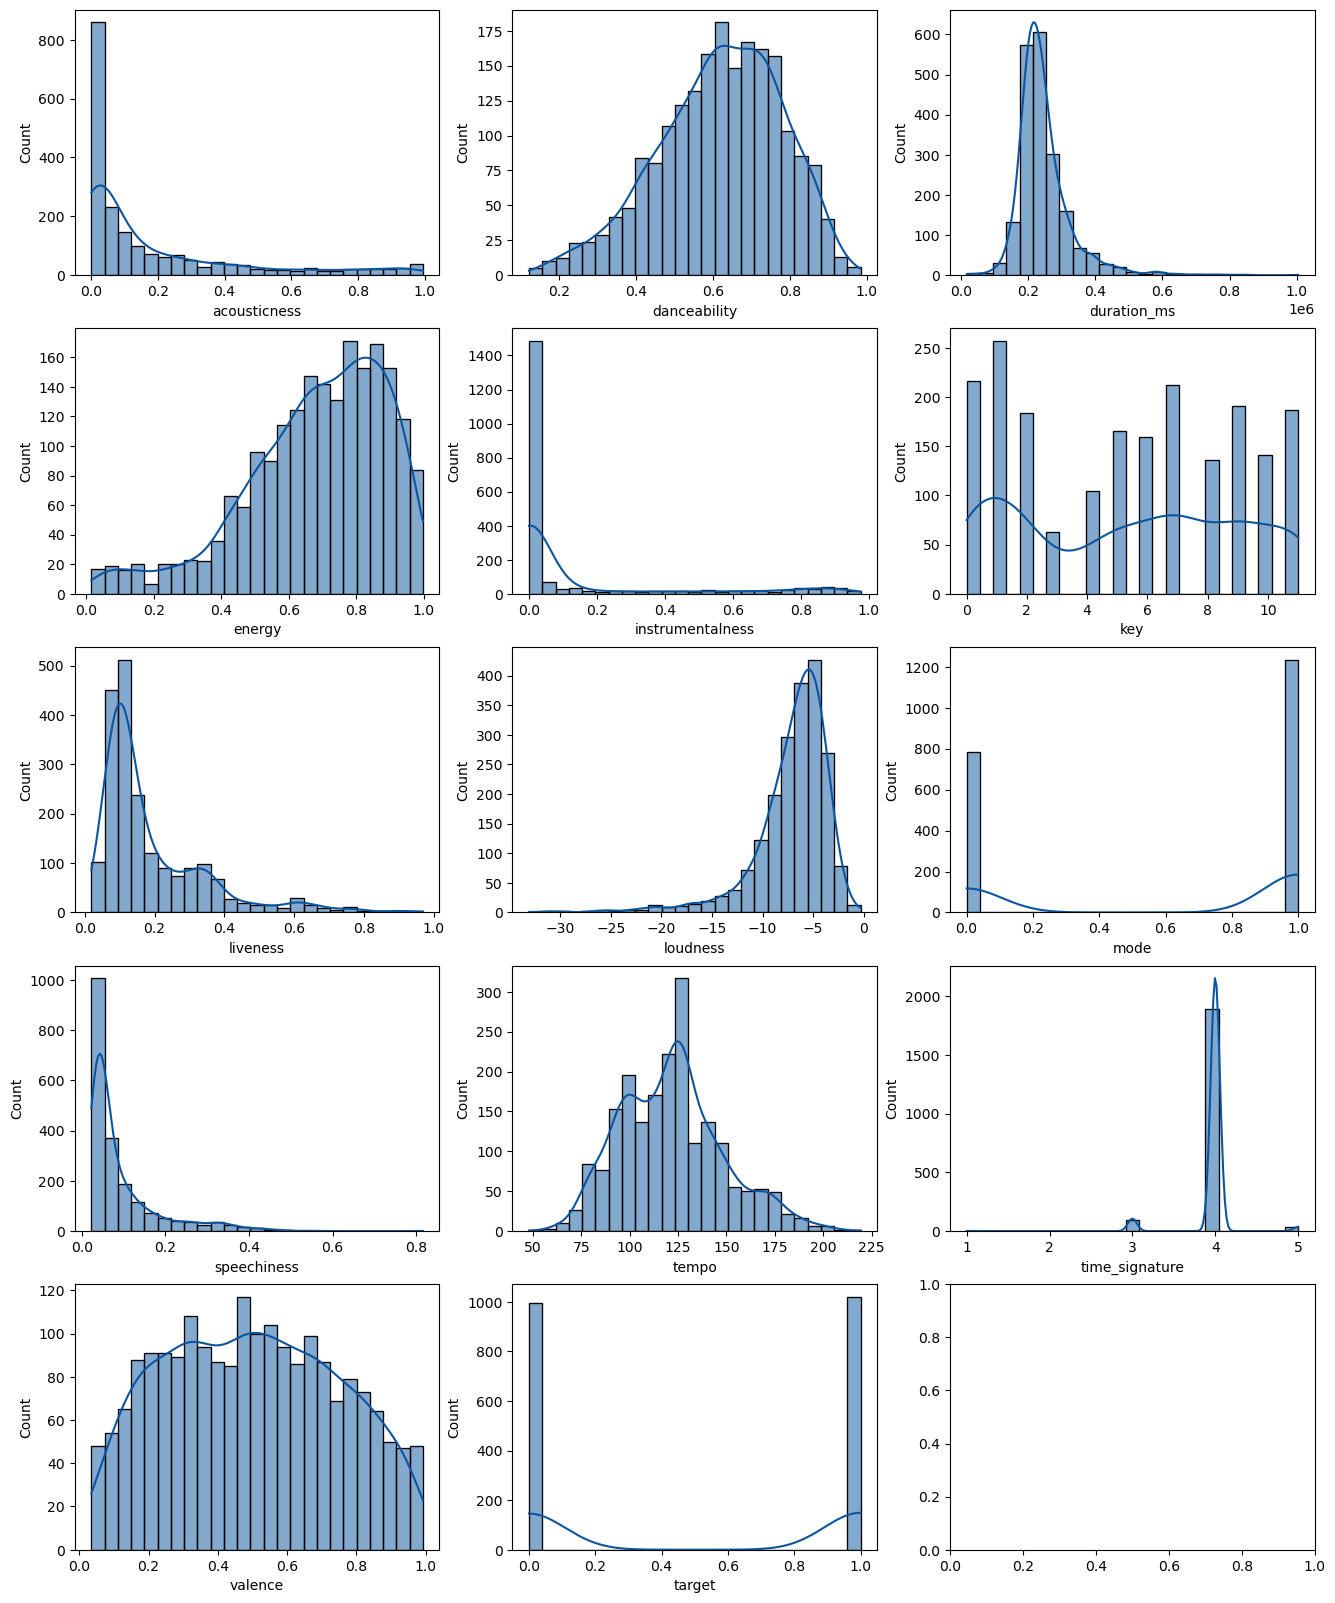

In [27]:
sns.set_palette("Blues_r")
fig, axes = plt.subplots(5,3,figsize=(16,20))
axes = axes.flatten()
ax_no = 0
for col in num_cols:
    sns.histplot(data = df, x=col, bins=25, kde=True, ax = axes[ax_no])
    ax_no += 1
plt.show()

In [28]:
continuous_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
    'liveness', 'loudness',  'tempo',  'valence', 'speechiness', 'instrumentalness']
discrete_cols = ['key','mode','time_signature','target']

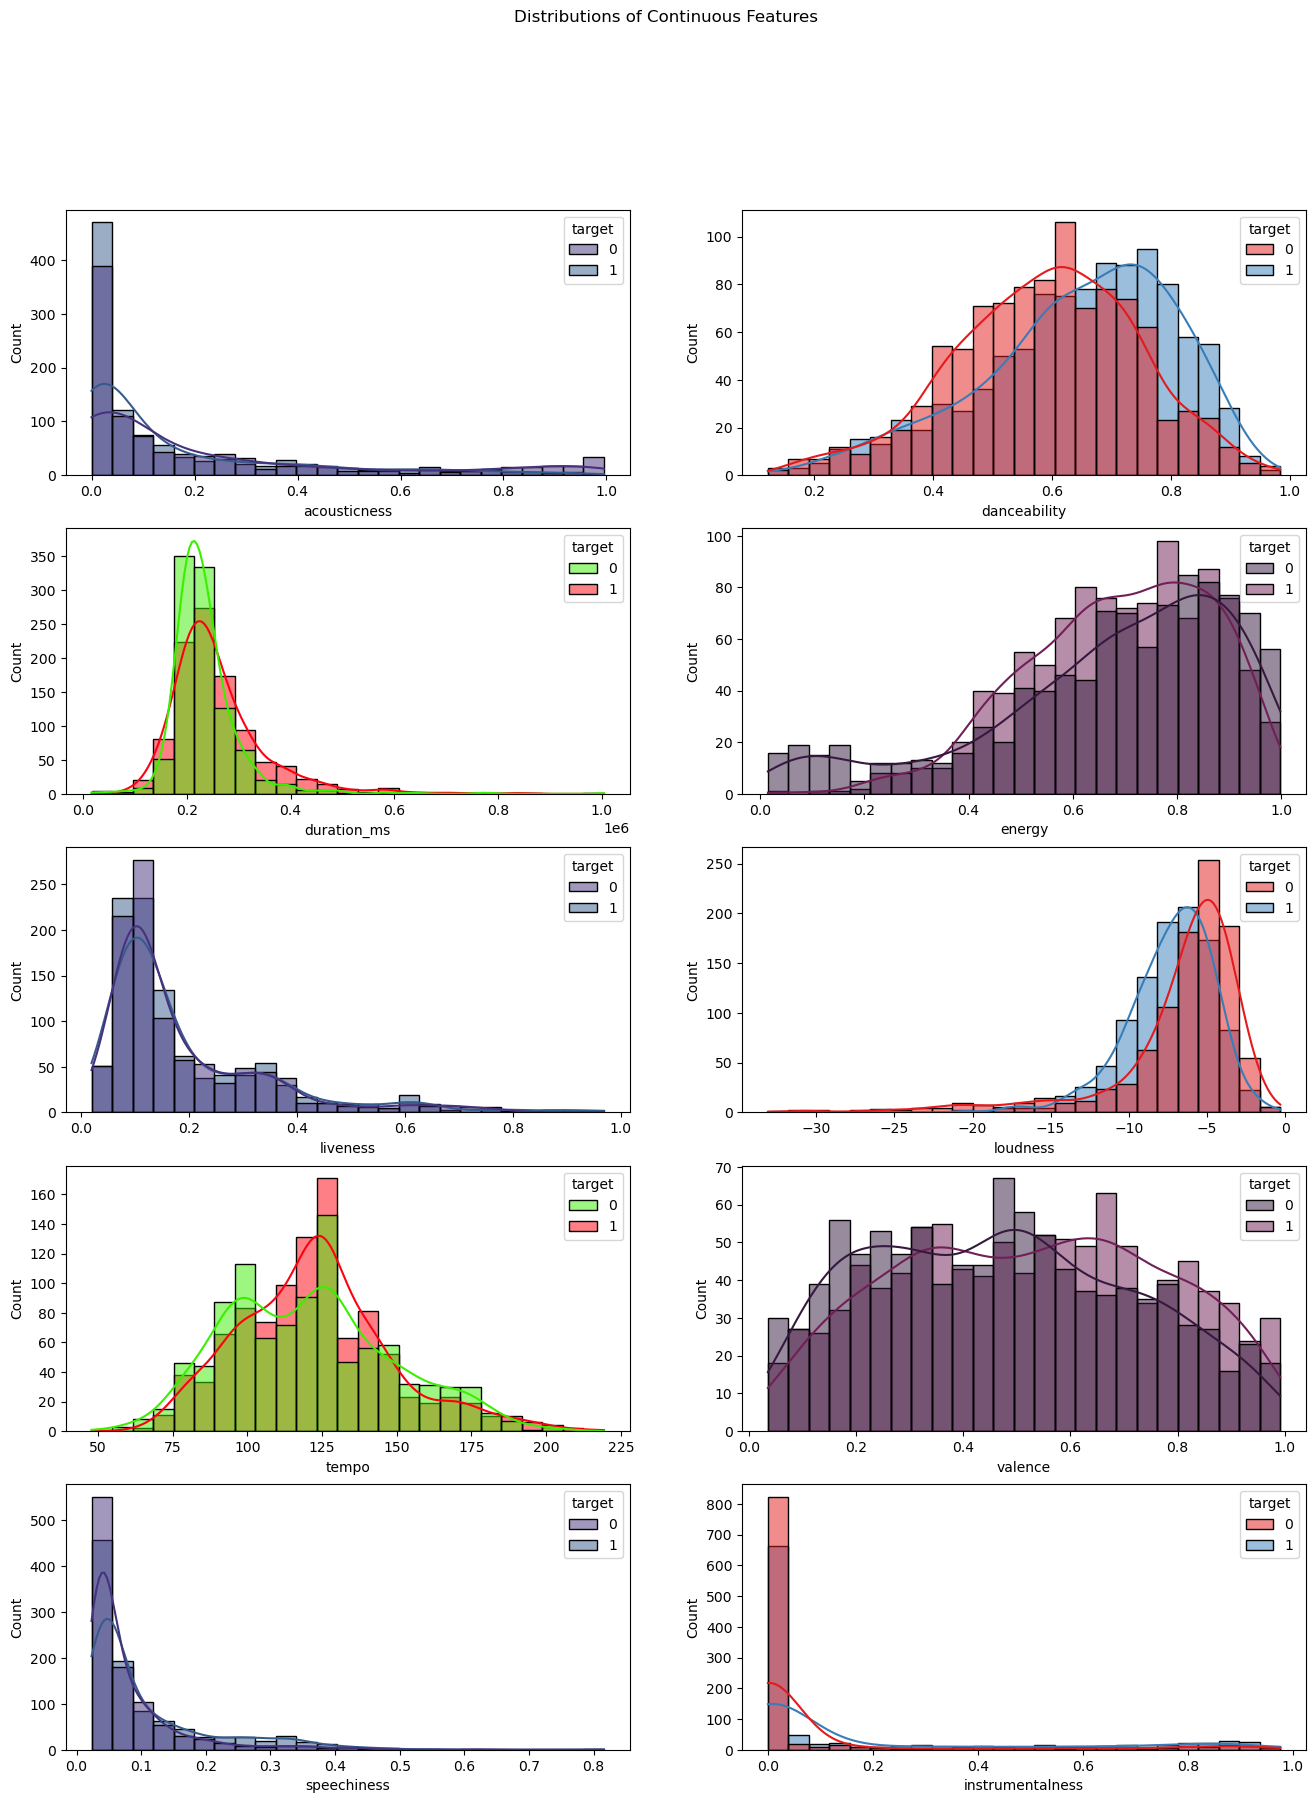

In [29]:
fig, axes = plt.subplots(5,2,figsize=(16,20))
palettes = ['viridis','Set1', 'prism', 'rocket']
axes = axes.flatten()
ax_no = 0
for col in continuous_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.histplot(data = df, x=col, hue='target', bins=25, kde=True, ax = axes[ax_no])
    ax_no += 1
fig.suptitle('Distributions of Continuous Features')
plt.show()

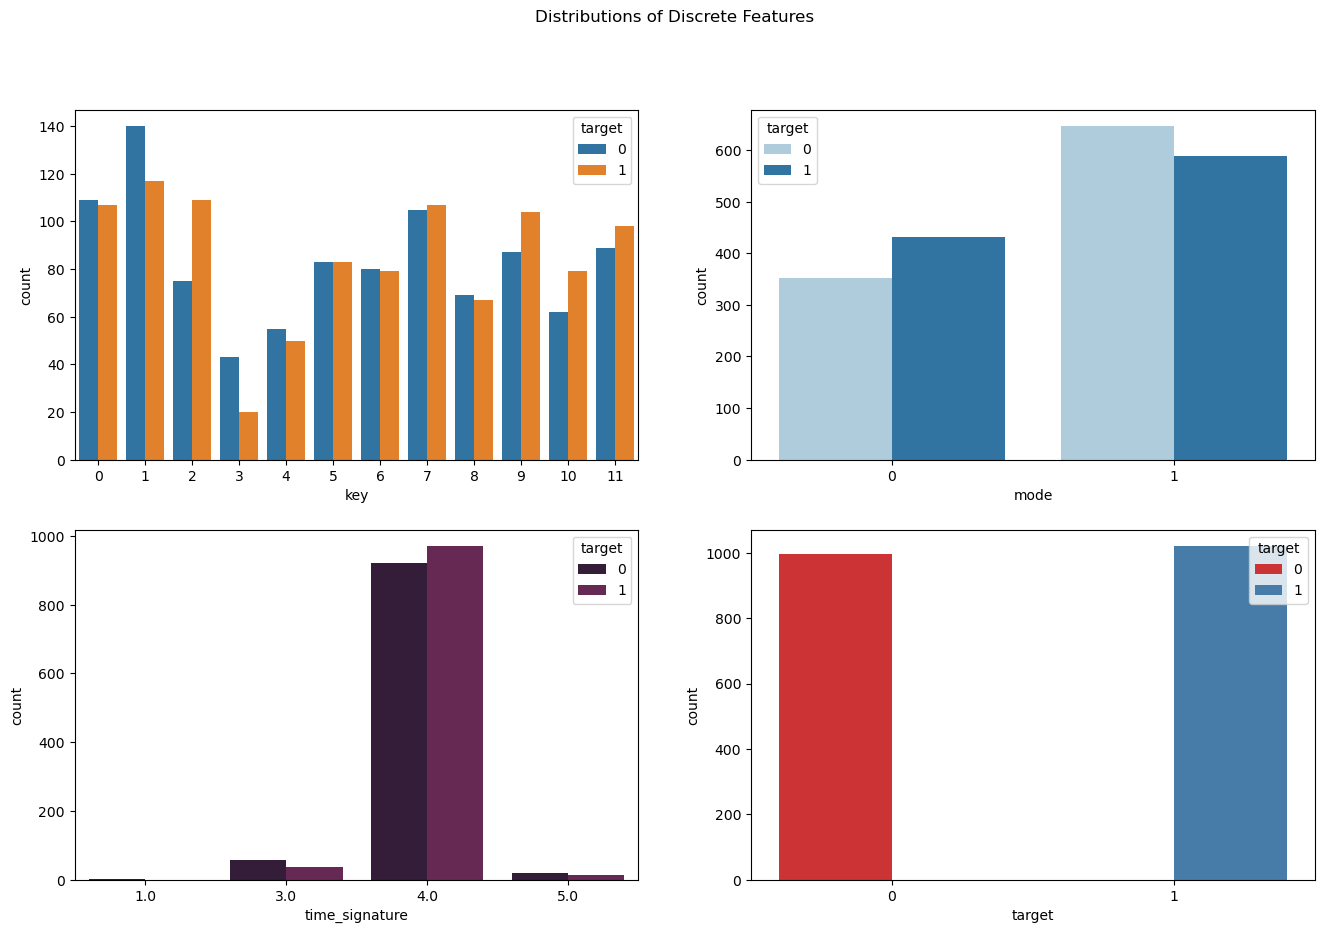

In [30]:
sns.set_palette("Set1")
fig, axes = plt.subplots(2,2,figsize=(16,10))
palettes = ['tab10', 'Paired', 'rocket', 'Set1']
axes = axes.flatten()
ax_no = 0
for col in discrete_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.countplot(data = df, x= col, ax = axes[ax_no], hue='target')
    ax_no += 1
fig.suptitle('Distributions of Discrete Features')
plt.show()

# Correlations

Text(0.5, 1.0, 'Negative Correlations')

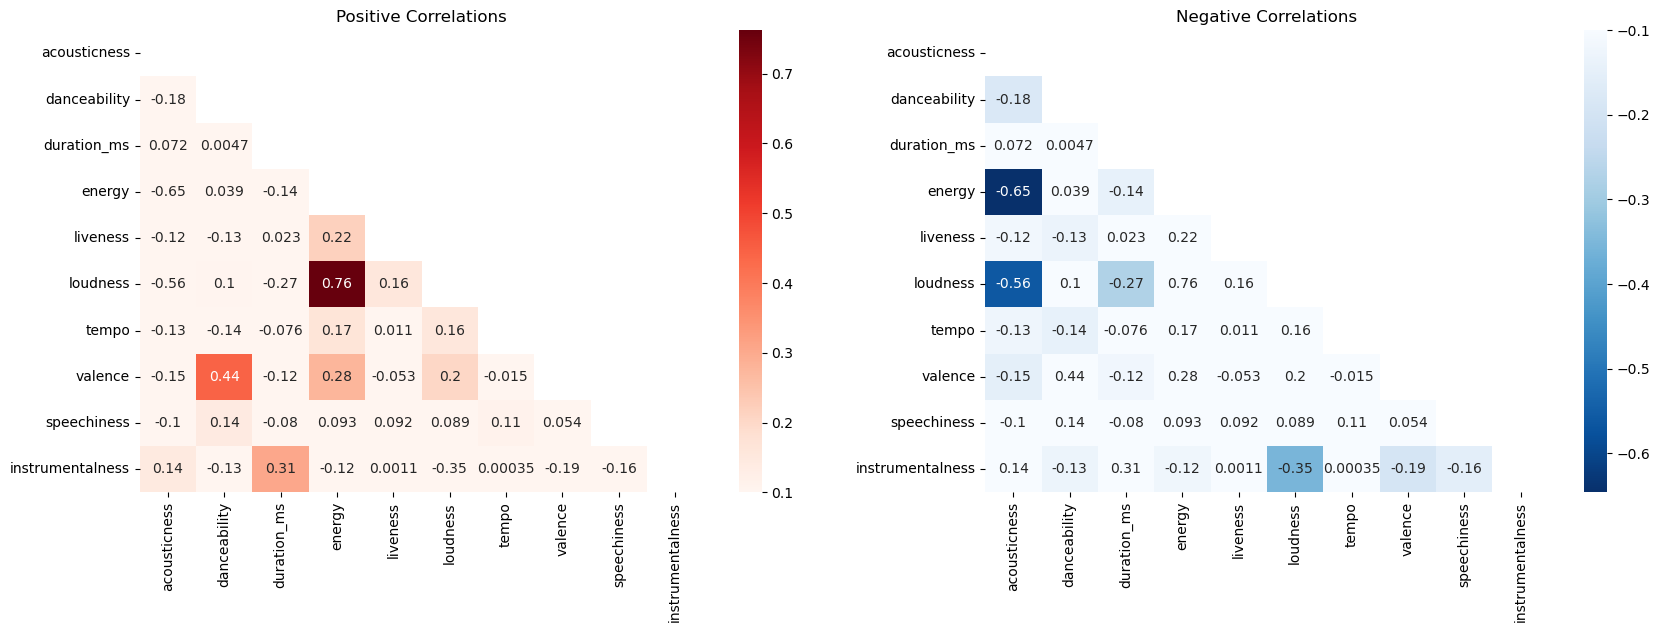

In [31]:
fig, axes = plt.subplots(1,2, figsize=(20,6))
corr = df[continuous_cols].corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(data= corr, annot=True, cmap ='Reds', ax = axes[0], mask = mask, vmin= 0.1)
axes[0].set_title('Positive Correlations')
sns.heatmap(data= corr, annot=True, cmap ='Blues_r', ax = axes[1], mask = mask, vmax=-0.1)
axes[1].set_title('Negative Correlations')

Text(0.5, 0.98, 'Correlation Analysis')

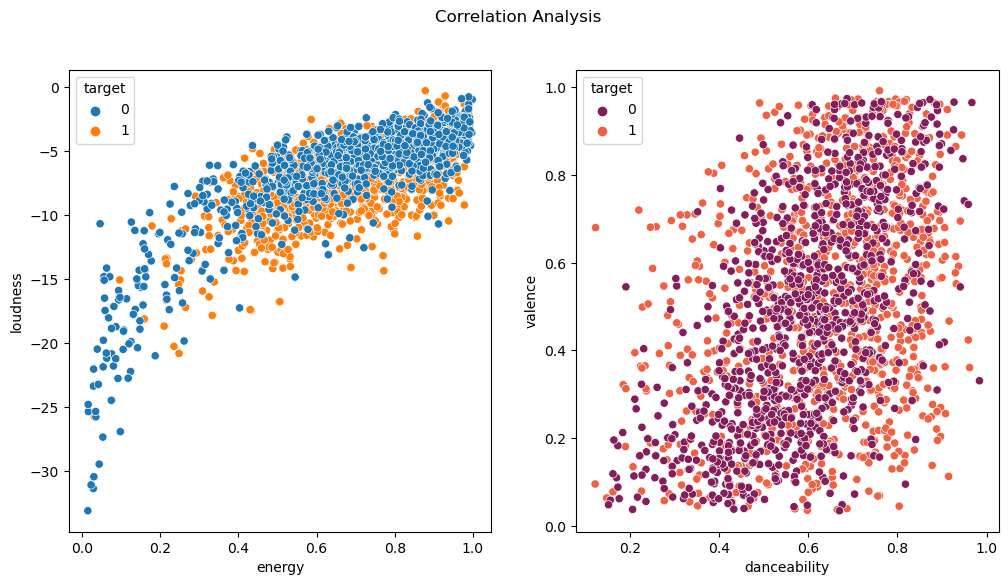

In [32]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes = axes.flatten()
palettes = ['tab10',  'rocket']
sns.scatterplot(data= df, x= 'energy', y= 'loudness', ax = axes[0], hue ='target', palette=palettes[0])
sns.scatterplot(data= df, x= 'danceability', y= 'valence', ax = axes[1], hue ='target',palette=palettes[1])
fig.suptitle('Correlation Analysis')

Text(0.5, 0.98, 'Correlation Analysis')

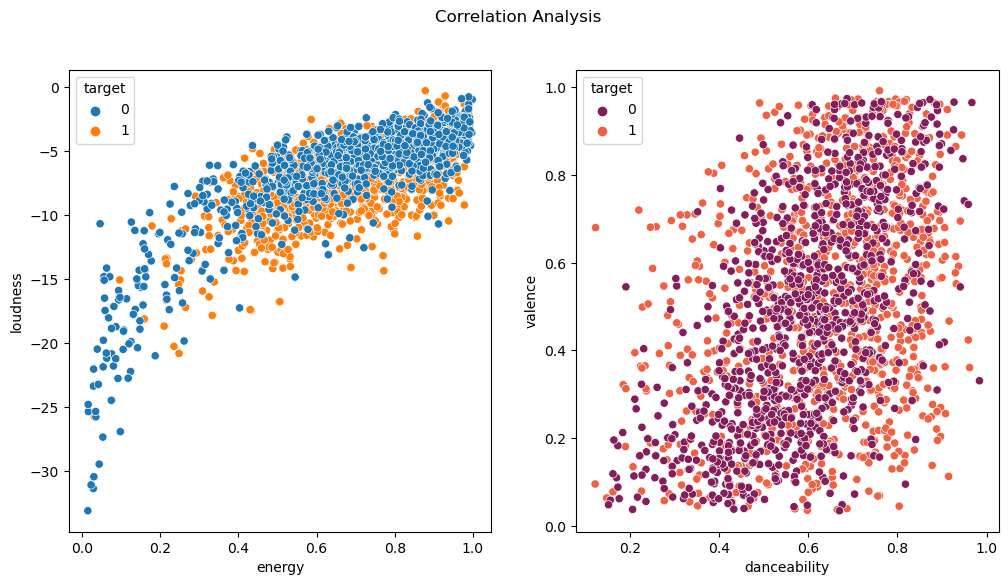

In [33]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes = axes.flatten()
palettes = ['tab10',  'rocket']
sns.scatterplot(data= df, x= 'energy', y= 'loudness', ax = axes[0], hue ='target', palette=palettes[0])
sns.scatterplot(data= df, x= 'danceability', y= 'valence', ax = axes[1], hue ='target',palette=palettes[1])
fig.suptitle('Correlation Analysis')

# Exploring Text Data

Text(0.5, 1.0, 'Artists with most songs')

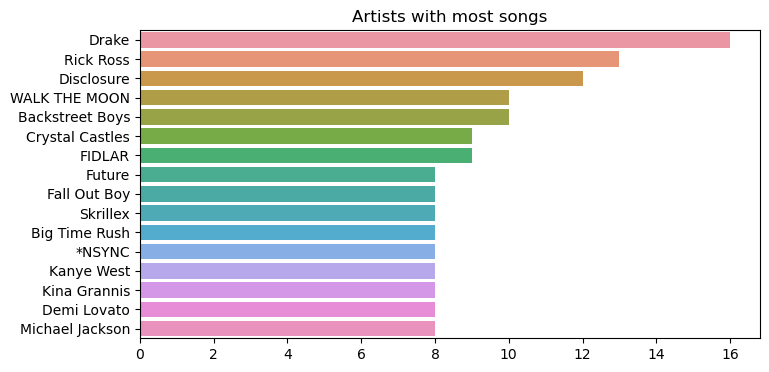

In [34]:
fig , axes = plt.subplots(1,1,figsize=(8,4))
top_artist_count = df.artist.value_counts()
sns.barplot(x = top_artist_count[:16].values, y= top_artist_count[:16].index, ax = axes)
plt.title('Artists with most songs')

In [35]:
len(df.song_title.unique())

1956

Too many unique values can't be selected as a feature